# Python Objects, Optical Traps, and the Ornstein-Uhlenbeck process

In this notebook, we will discover how object-oriented programming allows a level of abstraction that is well-suited for describing physical systems. We will focus on stochastic processes, a broad class of systems that are well described by random variables that change in time. We will use our simulations to study the first passage time distribution, a fundamental concept for understanding how random processes can have predictable ensemble properties.


[Click here to open this notebook in Colab](https://colab.research.google.com/github/williamgilpin/cphy/blob/main/talks/first_passage_and_inheritance.ipynb)

We start by importing the necessary Python packages.

<!-- Preamble: Run the cells below to import the necessary Python packages

*This notebook created by William Gilpin. Consult the [course website](https://www.wgilpin.com/cphy) for all content and [GitHub repository](https://github.com/williamgilpin/cphy) for raw files and runnable online code.* -->

In [3]:
# Import local plotting functions and in-notebook display functions
import matplotlib.pyplot as plt
%matplotlib inline

# Import linear algebra module
import numpy as np

# Ornstein-Uhlenbeck processes

Ornstein-Uhlenbeck processes describe the motion of a particle attached to a simple Hookean spring, in the presence of noise. They are a minimal model of physical systems with a balance of confining forces and stochastic forces. 

In biophysics and atomic physics, specialized devices called *optical traps* are well described by Ornstein-Uhlenbeck processes. Laser light is used to confine a particle near the center of the trap, but the particle jiggles in place due to Brownian forces because its small size.

<!-- ![Optical Trap Image](https://raw.githubusercontent.com/williamgilpin/cphy/main/resources/Silica_Nanosphere_in_Optical_Tweezer.jpg) -->

<img src="https://raw.githubusercontent.com/williamgilpin/cphy/main/resources/Silica_Nanosphere_in_Optical_Tweezer.jpg" height="400">
<img src="https://raw.githubusercontent.com/williamgilpin/cphy/main/resources/Optical_trap_principle_formula.png" height="400">

*A nanoparticle (103 nm in diameter) trapped by an optical tweezer. Bjschellenberg, CC BY-SA 4.0 via Wikimedia Commons and Cr4sZz, CC BY-SA 4.0 via Wikimedia Commons*


Mathematically, we can describe an Ornstein-Uhlenbeck process by writing a stochastic differential equation,

$$
dx_{t}=-\alpha \,x_{t}\,dt+\sigma \,dW_{t}
$$

This equation states that the infinitestimal displacement $dx_{t}$ of a particle over a short time interval is partly determined by a restoring force that scales with the spring constant $\alpha$, the current displacement $x_t$, and the duration of the interval $dt$. However, the motion is also driven by a noise term $dW_t$, which describes a series of random "kicks" to the particle at random times, with characteristic amplitude $\sigma$. 

A tighter, more confining optical trap with have a higher $\alpha$. Conversely, if we increase the temperature of the air around an optical trap, or decrease the size of the particle we are trapping, we expect that $\sigma$ will increase.

We want to simulate this stochastic process in discrete time. In order to do this, we will pick a specific, fixed time interval $\Delta t$, and write a difference equation,

$$
x_{t+1}=x_{t}-\alpha \,x_{t}\,\Delta t+\sigma \,\sqrt{\Delta t}\,Z_{t}
$$

where $Z_{t}$ is a standard normal random variable. Because Brownian forces correspond to a non-differential set of random kicks, they are well modeled by numbers randomly sampled from the normal distribution. However, one complication is that, over longer intervals $\Delta t$, it becomes possible for a series of random kicks to push the particle further from the center. We can account for this by introducing the scale factor $\sqrt{\Delta t}$ into our discrete-time dynamics.

Because $\Delta t$ appears in both terms in this expression, we can simplify by absorbing it into our two experimental parameters $\alpha$ and $\sigma$. Physically, this corresponds to measuring time in a set of units for which $\Delta t=1$.

<img src="https://raw.githubusercontent.com/williamgilpin/cphy/main/resources/ou_process.png" width="500">


## Python functions

Python functions are objects that can be called. They are defined using the `def` keyword, and can be called using the `()` syntax.

There are several unique features of Python functions that we will use in this course:
+ Keyword arguments are optional arguments that accept default values. The default values are used if the argument is not provided when the function is called.
+ Variables used within functions always have local scope, and are not accessible outside of the function.  
+ Docstrings are used to describe all arguments and returns in human-readable text. They are not used by the Python interpreter, but are used by tools like `help()` to provide information about the function.
+ We very often need to use functions that were written by others, in order to define our own functions. For example, we are going to import a library called `random`, which supports functions for sampling random distributions.






In [6]:
# Import additional modules of the python library, which implement features that we might need
import random
import math

def ornstein_uhlenbeck_process(x, alpha=0.1, sigma=1.0, dt=1.0):
    """
    One step for the dynamics of a particle in a harmonic potential, with Brownian noise

    Equivalent to an AR(1) process with alpha = 1

    Args:
        x (float): The current position of the particle
        alpha (float): The spring constant
        sigma (float): The amplitude of the random noise

    Returns:
        float: The position of the particle at the next time step
    """
    # forcing term
    drift = -alpha * x * dt

    # stochastic diffusion term
    # random.gauss(0, 1) samples a random value from a normal distribution with mean 0 
    # and variance 1
    diffusion = sigma * random.gauss(0, 1) * math.sqrt(dt)

    # The OU process is a combination of drift and diffusion
    x_nxt = x + drift + diffusion
    return x_nxt

Let's test that our implementation of the Ornstein-Uhlenbeck process is correct. We will create a for loop that runs the process for 400 steps, storing each step in a list that grows as we iterate. 

We can repeat the simulation for different values of the confinement strength $\alpha$ and the noise amplitude $\sigma$, and see how the behavior of the process changes. For each of the experiments, we modify $\alpha$ in different ways, to show the different syntax for passing arguments to functions. Since both $\alpha$ and $\sigma$ are keyword arguments with default values, we can set them directly. We can also pass values directly without naming them, as long as we follow the order of the arguments in the original function signature. We can also mix and match these different syntaxes, as long as we don't violate the order of the arguments.

Text(0, 0.5, 'position')

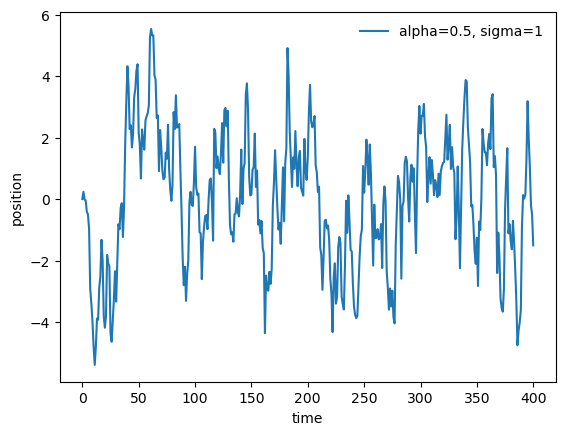

In [28]:
all_steps = [0]
for i in range(400):
    all_steps.append(
        ornstein_uhlenbeck_process(all_steps[-1], alpha=0.1, sigma=1)
    )
plt.plot(all_steps, label="alpha=0.5, sigma=1")
plt.xlabel("time")
plt.ylabel("position")

# all_steps = [0]
# for i in range(400):
#     all_steps.append(
#         ornstein_uhlenbeck_process(all_steps[-1], sigma=1, alpha=1)
#     )
# plt.plot(all_steps, label="alpha=1, sigma=1")

# all_steps = [0]
# for i in range(400):
#     all_steps.append(
#         ornstein_uhlenbeck_process(all_steps[-1], 0.0)
#     )
# plt.plot(all_steps, label="alpha=0, sigma=1")

plt.legend(frameon=False)
plt.xlabel("time")
plt.ylabel("position")



Python also supports an alternative syntax for defining functions, using the `lambda` keyword. This is useful for short functions with simple behavior.

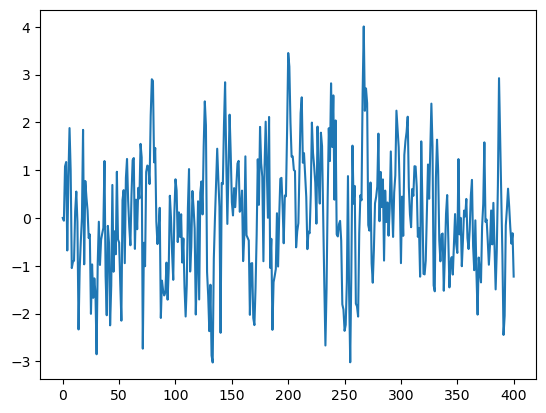

In [17]:

ornstein_uhlenbeck_process_alternate = lambda x, alpha=0.5, sigma=1.0, dt=1.0: x - alpha * x * dt+ sigma * random.gauss(0, 1) * math.sqrt(dt)

all_steps = [0]
for i in range(400):
    all_steps.append(ornstein_uhlenbeck_process_alternate(all_steps[-1]))
plt.figure()
plt.plot(all_steps)

As in other languages, the variables occuring within Python functions have local scope. For example, if we attempt to access the variable `drift` that we used inside `ornstein_uhlenbeck_process`, we will get an error.

In [20]:
print(drift) # this will fail because drift is not defined outside of the function

NameError: name 'drift' is not defined

As we have seen before, we can use the help functions to check the docstring that we wrote for our function.

In [22]:
help(ornstein_uhlenbeck_process)

Help on function ornstein_uhlenbeck_process in module __main__:

ornstein_uhlenbeck_process(x, alpha=0.1, sigma=1.0, dt=1.0)
    One step for the dynamics of a particle in a harmonic potential, with Brownian noise

    Equivalent to an AR(1) process with alpha = 1

    Args:
        x (float): The current position of the particle
        alpha (float): The spring constant
        sigma (float): The amplitude of the random noise

    Returns:
        float: The position of the particle at the next time step



We can also use the help function to get information about functions we imported from elsewhere.

In [24]:
help(random.gauss)

Help on method gauss in module random:

gauss(mu=0.0, sigma=1.0) method of random.Random instance
    Gaussian distribution.

    mu is the mean, and sigma is the standard deviation.  This is
    slightly faster than the normalvariate() function.

    Not thread-safe without a lock around calls.



In [ ]:
type(ornstein_uhlenbeck_process) # type check

function

In [25]:
print(dir(random.gauss)[:10])

['__call__', '__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__func__', '__ge__', '__get__']


## Conditional halting of a process

In our implementation of the Ornstein-Uhlenbeck process, we run the process for a fixed number of timesteps. However, we might be interested in simulating a trapped particle until the particle escapes by crossing some barrier. In this case, we want a loop that terminates not when a fixed number of iterations is reached, but rather when some condition is met. In this case, we want to use a `while` loop

Text(0, 0.5, 'Position')

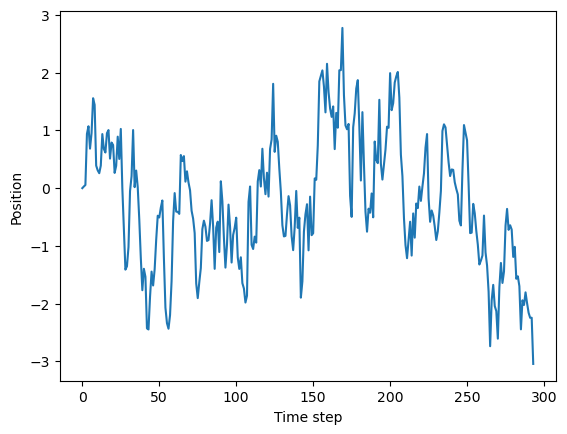

In [48]:
# We import Python's linear algebra library, which is used to 
import numpy as np

# set pseudorandom seed
# random.seed(5)

all_steps = [0]
while abs(all_steps[-1]) < 3:
    all_steps.append(
        ornstein_uhlenbeck_process(all_steps[-1], alpha=0.1, sigma=0.5)
    )

plt.figure()
plt.plot(np.arange(len(all_steps)), all_steps)
plt.xlabel('Time step')
plt.ylabel('Position')

### First passage time distributions

Our modified Ornstein-Uhlenbeck process runs until the particle crosses a fixed barrier. We can repeat this process many times, and observe the distribution of times it takes for the particle to cross the barrier. In physics, the [first-passage time distribution](https://arxiv.org/abs/2201.10048) is the probability distribution of the times it takes for a stochastic process to first reach a certain value. 

We can think of our simulation as probing a distribution of outcomes. Across many experiments on an optical trap with stiffness $\alpha$ and noise amplitude $\sigma$, how long do we expect to trap the particle?

Another example where first passage time distributions are useful is in the study of chemical reactions. Oftentimes, reactants must first reach a certain energy threshold before they can react. The distribution of times it takes for the reactants to reach this threshold is the first passage time.

Text(0, 0.5, 'Count')

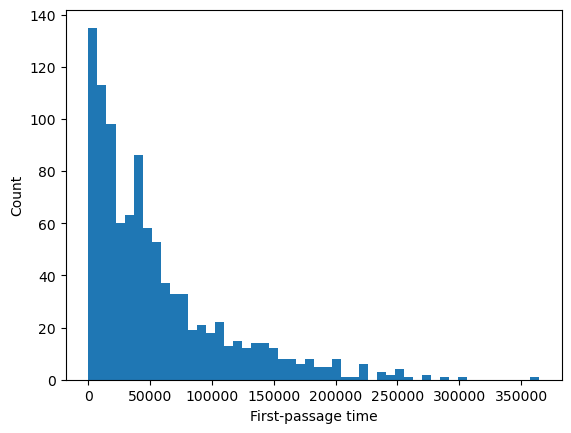

In [50]:
## now run a simulation with many trajectories to get the distribution of first-passage times
all_fpt_durations = []
for i in range(1000): # number of experiments
    all_steps = [0]
    while abs(all_steps[-1]) < 3:
        all_steps.append(ornstein_uhlenbeck_process(all_steps[-1], alpha=0.3, sigma=0.5))

    all_fpt_durations.append(len(all_steps))

plt.figure()
plt.hist(all_fpt_durations, bins=50);
plt.xlabel('First-passage time')
plt.ylabel('Count')

## Python functions are objects

We can pass Python functions to other functions, as if they were any other variable. Below, we'll use lambda functions to define two versions of an Ornstein-Uhlenbeck process with different stiffnesses, as well as a Weiner process (the case where $\alpha=0$) and random jumps. 

In [53]:
# Define several stochastic processes with constant variance 1.0 and varying stiffness
ornstein_uhlenbeck_process_wide = lambda x: x - 0.05 * x + random.gauss(0, 1)

ornstein_uhlenbeck_process_tight = lambda x: x - 0.5 * x + random.gauss(0, 1)

wiener_process = lambda x: x + random.gauss(0, 1)

random_walk = lambda x: random.gauss(0, 1)

Next, we will define a function that will take a given stochastic process as an argument, and return the first passage time distribution.

In [54]:

def first_passage_time(process, n_sim=10000, xc=3):
    """
    Given a random process, perform n_sim simulations and return the durations

    Args:
        process (callable): a function that takes a single argument and returns a single value
        n_sim (int): number of simulations to run
        xc (float): the crossing threshold for the first passage time

    Returns:
        list: durations of the first passage times
    """
    all_fpt_durations = []
    for i in range(n_sim):
        all_steps = [0]
        while np.abs(all_steps[-1]) < xc:
            all_steps.append(process(all_steps[-1]))

        all_fpt_durations.append(len(all_steps))

    return all_fpt_durations

help(first_passage_time)


Help on function first_passage_time in module __main__:

first_passage_time(process, n_sim=10000, xc=3)
    Given a random process, perform n_sim simulations and return the durations

    Args:
        process (callable): a function that takes a single argument and returns a single value
        n_sim (int): number of simulations to run
        xc (float): the crossing threshold for the first passage time

    Returns:
        list: durations of the first passage times



We will now use this function to calculate the first passage time distribution for a stiff and wide Ornstein-Uhlenbeck processes.

Text(0.5, 1.0, 'Wiener process')

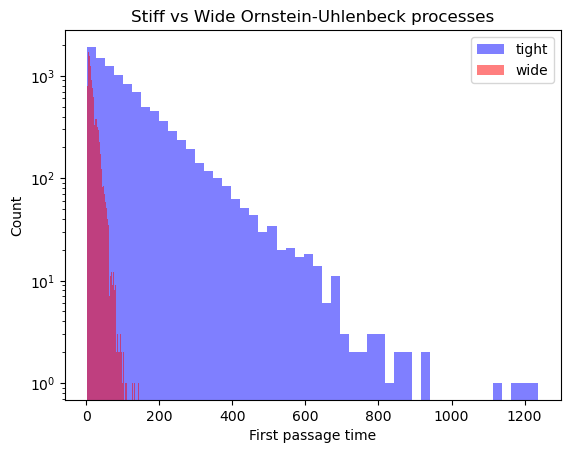

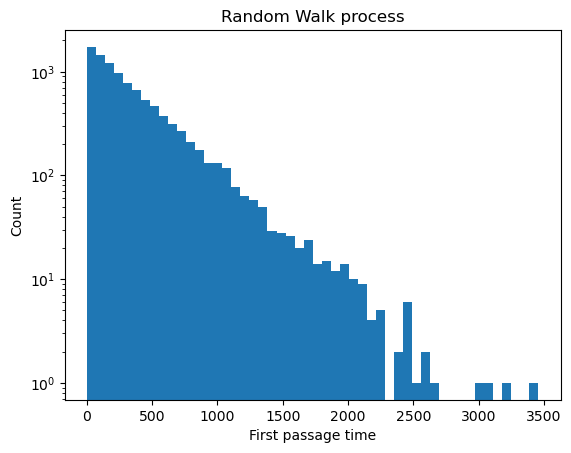

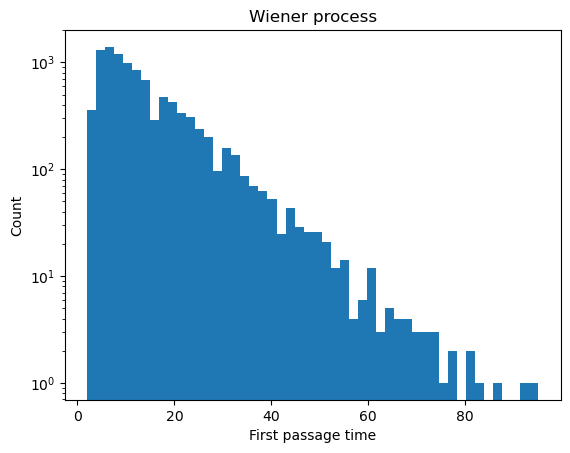

In [55]:
# Generate the first passage time distributions
fpt_times_tight = first_passage_time(ornstein_uhlenbeck_process_tight)
fpt_times_wide = first_passage_time(ornstein_uhlenbeck_process_wide)

plt.figure()
plt.semilogy()
plt.hist(fpt_times_tight, bins=50, alpha=0.5, label='tight', color='b')
plt.hist(fpt_times_wide, bins=50, alpha=0.5, label="wide", color='r')
plt.legend()
plt.title("Stiff vs Wide Ornstein-Uhlenbeck processes")
plt.xlabel("First passage time")
plt.ylabel("Count")


plt.figure()
plt.semilogy()#Make a plot with log scaling on the y-axis
plt.hist(first_passage_time(random_walk), bins=50);
plt.xlabel("First passage time")
plt.ylabel("Count")
plt.title("Random Walk process")

plt.figure()
plt.semilogy()
plt.hist(first_passage_time(wiener_process), bins=50);
plt.xlabel("First passage time")
plt.ylabel("Count")
plt.title("Wiener process")

### Questions

+ Why does the more strongly-confined process have a narrower first passage time distribution?

## What is the simulation showing?

The first-passage time distribution of an Ornstein-Uhlenbeck process is 
[difficult to compute analytically](https://doi.org/10.1088/1751-8121/ab0836), but our simulations suggest that it exhibits a predominantly exponential decay at long times. We can use our results to motivate an analytical approximation for the first-passage time distribution.


We first define the Ornstein-Uhlenbeck process symbolically. We define the drift term to be negative, so the process is mean-reverting.

$$
dx_{t}=-\alpha \,x_{t}\,dt+\sigma \,dW_{t}
$$

We are using the [Ito](https://en.wikipedia.org/wiki/It%C3%B4_calculus) interpretation of the stochastic differential equation. Notice how when $dW_t$ is zero, we recover a familiar ordinary differential equation. We use this notation because the stochastic term itself cannot be differentiated.

The solution to this equation is:
$$
x_{t}=x_{0}\,e^{-\alpha t} + \sigma \int_{0}^{t}e^{-\alpha (t-s)}\,dW_{s}
$$

Notice that the second term resembles a Laplace transformation. We can next define a first-passage time function on this interval:

$$
\tau = \inf \{t>0: |x_{t}| \geq x_c\}
$$

where $x_c$ is the crossing threshold. 



### Understanding the motion of ensembles of particles

The Fokker-Planck equation allows us to go from studying the motion of a single particle, $x_{t}$, to instead studying the motion of a distribution of particles, $p(x, t)$. Across many random runs of the process, or many random optical trap experiments, $p(x, t)$ tells us how often we expect to find a particle at position $x$ at time $t$.

The Fokker-Planck equation for an Ornstein-Uhlenbeck process is

$$
\frac{\partial}{\partial t}p(x, t) = \alpha \frac{\partial}{\partial x} \left(x \, p(x, t) \right) + \frac{1}{2}\sigma^{2}  \frac{\partial^{2}}{\partial x^{2}}p(x, t)
$$

Unlike the single-particle stochastic process, the Fokker-Planck equation describes the *distribution* of trajectories under the process over time. In order to solve this partial differential equation, we need to learn more about how ensembles of trajectories from our process behave.

Text(0, 0.5, 'Count')

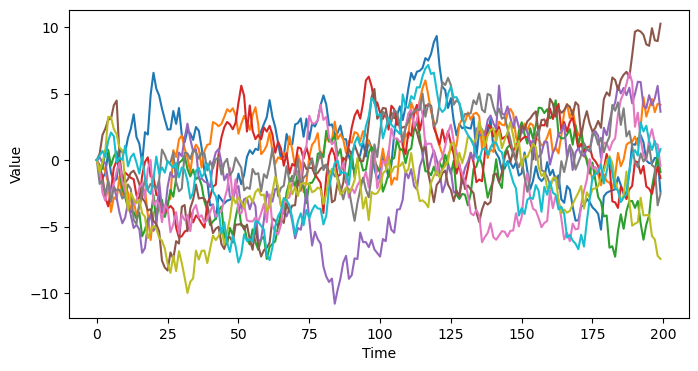

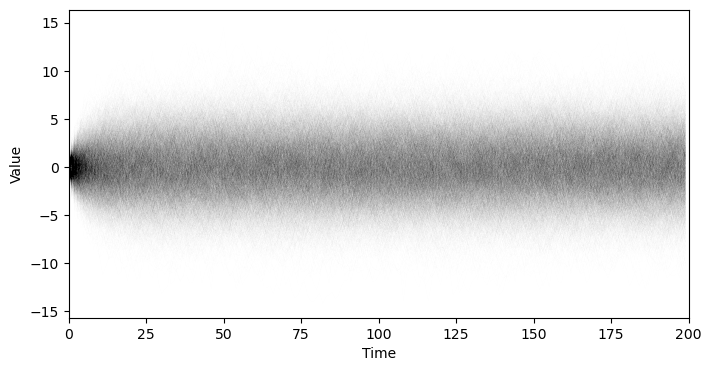

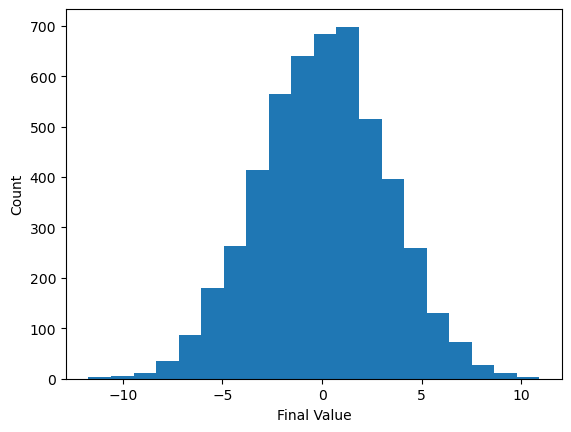

In [56]:
def run_simulation(process, n_sim, n_tpts):
    """
    A function that runs a given stochastic process n_sim times, and returns an 
    array of the results. The process is assumed to be a function that takes a
    single argument (the current value of the process) and returns the next
    value of the process.

    Args:
        process (function): A function that takes a single argument (the current
            value of the process) and returns the next value of the process.
        n_sim (int): The number of simulations to run.
        n_tpts (int): The number of time points to simulate.

    Returns:
        all_simulations (np.ndarray): An array of shape (n_sim, n_tpts) containing
            the results of the simulations. The first axis indexes the simulation
            replicate, and the second axis indexes the time point.
    """

    # Since we know the size of our output in advance, we can pre-allocate the 
    # solution array to avoid the overhead of adding elements to a list
    all_simulations = np.zeros((n_sim, n_tpts))

    for i in range(n_sim):
        for j in range(1, n_tpts):
            all_simulations[i, j] = process(all_simulations[i, j - 1])
    
    return all_simulations



out = run_simulation(ornstein_uhlenbeck_process_wide, 10, 200)
plt.figure(figsize=(8, 4))
plt.plot(out.T);
plt.xlabel('Time')
plt.ylabel('Value')


out = run_simulation(ornstein_uhlenbeck_process_wide, 5000, 200)
plt.figure(figsize=(8, 4))
plt.plot(out.T, color='k', alpha=0.005, linewidth=0.5);
plt.xlim(0, out.shape[1])
plt.xlabel('Time')
plt.ylabel('Value')

plt.figure()
plt.hist(out[:, -1], bins=20);
plt.xlabel('Final Value')
plt.ylabel('Count')




It looks like the long-time limit of the process is a Gaussian distribution. We can therefore solve the Fokker-Planck equation by imposing the analytical ansatz,
$$
p(x, t) = \frac{1}{\sqrt{2\pi \Sigma^2(t)}} \exp \left(-\frac{x^2}{2\,\Sigma^2(t)} \right)
$$
We next insert this ansatz into the Fokker-Planck equation with an initial condition given by $p(x,0) = \delta(x)$, because all of our simulations start at the origin.

Simplification of the resulting expression produces an ordinary differential equation for $\Sigma(t)$:
$$
\frac{d\Sigma(t)}{dt} = \sigma^2 + 2\alpha \Sigma(t)
$$

We impose the initial condition $\Sigma(0) = 0$ to find the solution. To avoid singularities, this can be accomplished by setting $\Sigma(0) = \epsilon$, solving the initial value problem, and then taking the limit $\epsilon \rightarrow 0$, we arrive at the expression for $\Sigma(t)$:

$$
\Sigma^2(t) = \frac{\sigma^2}{2\alpha} \left( 1 - e^{-2\alpha t} \right)
$$

We can see that over a timescale $\tau = 1/(2 \alpha)$, the variance of the distribution reaches an asymptotic value of $\tilde\Sigma^2 = \sigma^2/(2\alpha)$. For our tight and wide simulations, $\tau = 1^2 / (2 \cdot 0.5) = 1$ and $\tau = 1^2 / (2 \cdot 0.05) = 10$, respectively, confirming that our first passage distributions involve timescales beyond the asymptotic limit of the variance. We refer to the stationary Gaussian distribution as $\tilde p(x)$ to distinguish it from the transient time-dependent distribution $p(x,t)$.

In the asymptotic limit, we can think of the Ornstein-Uhlenbeck process as continuously sampling values from a stationary Gaussian distribution. The probability of success of a given draw is given by the fraction of the distribution that lies above the threshold at $x_c$ at any given time, which is given by $\int_{x_c}^{\infty} \tilde p(x) \, dx$. In discrete time, if we assume each draw is independent, then the probability of success after $n$ draws is given by the binomial distribution. In continuous time, this process asymptotically approaches an exponential distribution.

## Questions

1. What is the probability of success after $n$ draws from a Gaussian distribution with mean $0$ and variance $\sigma^2$?

2. Taking the continuous-time limit, what is the probability of success after a time $\tau$?

3. Given the expression for the variance of the Ornstein-Uhlenbeck process described above, what is the probability density function for the first-hitting time $\tau$?




<!-- $$
P(\tau \leq t) = \int_{x_c}^{\infty} p(x,t) \, dx = \dfrac12 \text{Erfc}\left(\dfrac{x_c}{\sqrt{2}\; \Sigma(t)}\right)
$$

From this we can calculate the probability density function for the first-hitting time,

$$
p(\tau = t) = \frac{d}{dt}P(\tau \leq t) 
$$
$$
p(\tau = t) = p(x_c, t) x_c \dot \Sigma(t)
$$
we insert our expression for $\Sigma(t)$ and find
$$
p(\tau = t) = p(x_c, t) x_c \sigma^2 e^{-2 \alpha t}
$$

Thus demonstrating the origin of the long-time exponential term in our observed first passage distribution. 

We note that some additional subtlety arises from the time dependence of $p(x_c, t)$. A more rigorous derivation requires defining the variable $\epsilon = e^{-2\alpha t}$ and expanding the full expression for $p(\tau = t)$ in powers of $\epsilon$ near $0$. The leading-order linear term describes the long-timescale exponential tail behavior of the first-passage time distribution. More accurate expressions for the first-passage time distribution [can be derived](https://doi.org/10.2307/3213779), and they are often best-expressed in Laplace transform space due to their mixed exponential decay. -->

Text(0, 0.5, 'Count')

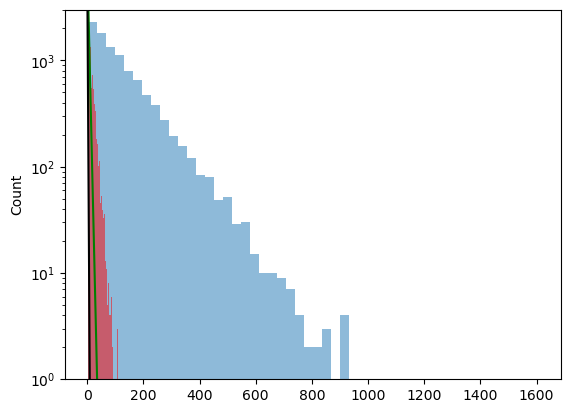

In [ ]:

tvals = np.arange(0, 1000)

plt.figure()
plt.semilogy()
plt.hist(fpt_times_tight, bins=50, alpha=0.5) # 0.5
plt.hist(fpt_times_wide, bins=50, alpha=0.5, color='r') # 0.05

# plt.semilogy(10000 * np.exp(-2 * 0.004 * tvals), 'k')
# plt.semilogy(10000 * np.exp(-2 * 0.05 * tvals), 'k')
plt.semilogy(10000 * np.exp(-0.259398 * tvals), 'g')
plt.semilogy(10000 * np.exp(-1 * tvals), 'k')
plt.ylim(1, 3000)
# plt.xlim(0, 100)


# plt.figure()
# plt.semilogy()
# plt.hist(fpt_times_tight, bins=50, alpha=0.5)
# plt.hist(fpt_times_wide, bins=50, alpha=0.5, color='r')
# plt.legend()
# plt.title("Stiff vs Wide Ornstein-Uhlenbeck processes")
# plt.xlabel("First passage time")
plt.ylabel("Count")

## Classes and object-oriented programming

Classes are abstract Python objects that bundle variables and functions, which are usually called "methods" in this setting. When writing large libraries, classes provide a way to keep track of the state of objects like simulations, and so they are critical for scaling up codebases.

In [ ]:
import random
def ornstein_uhlenbeck_process(x, alpha=0.1, sigma=1.0, dt=1.0):
    """
    One step for the dynamics of a particle in a harmonic potential, with Brownian noise

    Equivalent to an AR(1) process with alpha = 1

    Args:
        x (float): The current position of the particle
        alpha (float): The spring constant
        sigma (float): The amplitude of the random noise
        dt (float): The time step

    Returns:
        x_nxt (float): The next position of the particle
    """
    # forcing term
    drift = -alpha * x# * dt

    # stochastic diffusion term
    # random.gauss(0, 1) samples a random value from a normal distribution with mean 0 
    # and variance 1
    diffusion = sigma * random.gauss(0, 1)# * math.sqrt(dt)

    # The OU process is a combination of drift and diffusion
    x_nxt = x + drift + diffusion
    return x_nxt

**Class Syntax.** All classes have constructor methods named `__init__`, where Python reserves space for the object and sets the initial values of variables bound to the class, which are called "instance variables" in this setting. When you instantiate a class by assigning a variable, the constructor is called and it builds the object. In our OrnsteinUhlenbeckProcess class, we define the constructor to take two physical parameters describing our simulation, `alpha` and `sigma`, and the constructor sets the instance variables `self.alpha` and `self.sigma` to the values of the arguments.

Methods are functions that are bound to a class, and which are typically used to modify or query their state. In our OrnsteinUhlenbeckProcess class, we define two methods: `step` and `run_process`. The `step` method takes the current state of the process and returns the next state, and the `run_process` method takes the number of steps to run the process and returns the trajectory. Even though the class methods are defined within the class, they require their first argument to always be the `self` keyword, indicating that they will use object-specific variables or methods.

In our `OrnsteinUhlenbeckProcess` class, we define a method `step` that evolves the Ornstein-Uhlenbeck process by one step. This method uses the class instance variables `self.alpha` and `self.sigma` to compute the next state of the process. These bound functions thus use bound variables without them directly being passed as arguments (they are "bound" to the class through the `self` keyword). The `__init__` method can take standard arguments and keyword arguments, just like any other Python function.

The `run_process` method does not use any instance variables, but it does use the `step` method, which it has access to through the `self` keyword. This function also takes a standard argument, `n_steps`, which is the number of steps to run the process, as well as an optional keyworkd argument `x0`, which is the initial state of the process. If this argument is not provided, the process will start at the origin.

0.1 0.5
0.2 0.1


Text(0, 0.5, 'Position')

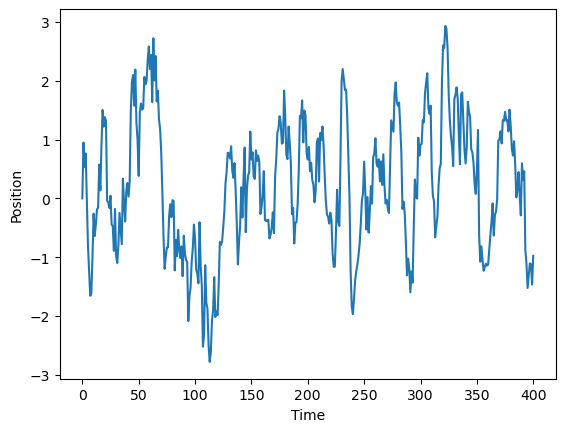

In [ ]:
import random
class OrnsteinUhlenbeckProcess:
    """
    A class for generating Ornstein-Uhlenbeck processes.

    Parameters:
        alpha (float): spring constant
    """
    # Constructor (mandatory for isolated class)
    def __init__(self, alpha=0.2, sigma=1.0):
        self.alpha = alpha
        self.sigma = sigma

    def step(self, x):
        drift = -self.alpha * x
        diffusion = self.sigma * random.gauss(0, 1)
        return x + drift + diffusion

    def run_process(self, n_steps, x0=0):
        """This method runs the Ornstein-Uhlenbeck process for n_steps, starting from x0"""
        all_steps = [x0]
        for i in range(n_steps):
            all_steps.append(self.step(all_steps[-1]))
        return all_steps

    ## double underscore methods are special methods to python
    # def __call__(self, x):
    #     return self.step(x)


process1 = OrnsteinUhlenbeckProcess(sigma=0.5, alpha=0.1)
print(process1.alpha, process1.sigma)

process2 = OrnsteinUhlenbeckProcess(alpha=0.2, sigma=0.1)
print(process2.alpha, process2.sigma)

traj = process1.run_process(400)
# # traj = process1(400) # use the special "call" method

plt.figure()
plt.plot(traj)
plt.xlabel("Time")
plt.ylabel("Position")



# process2 = OrnsteinUhlenbeckProcess(0.001, 0.1)
# traj = process2.run_process(400)
# # traj = process2(400) # use the special "call" method
# plt.xlabel("Time")
# plt.ylabel("Position")

# plt.figure()
# plt.plot(traj)
# plt.xlabel("Time")
# plt.ylabel("Position")

In [55]:
help(process1.run_process)

Help on method run_process in module __main__:

run_process(n_steps, x0=0) method of __main__.OrnsteinUhlenbeckProcess instance
    Runs the process



# Inheritance

Inheritance allows you to recycle code by defining abstract classes, then specific refinements of the abstract class known as "subclasses".

In *hierarchical inheritance*, the most common type of inheritance, multiple child classes inherit shared methods from a parent class. For example, we might define a generic `StochasticProcess` class, and then define specific types of stochastic processes like `WienerProcess` or `OrnsteinUhlenbeckProcess` as subclasses of the `StochasticProcess` class. Likewise, we might define a generic `NumericalIntegration` class, and then define specific types of numerical integration methods like `Euler` or `RungeKutta` as subclasses of the `NumericalIntegration` class.

Another type of inheritance is *multiple inheritance*, where a child class inherits from multiple parent classes. This often occurs when one wants to access a large number of methods that are associated with multiple parent classes. These usually result in new objects with very different behaviors from other parent. The popular Python library `Dysts` uses multiple inheritance to create new objects that combine learning model types and problem types.

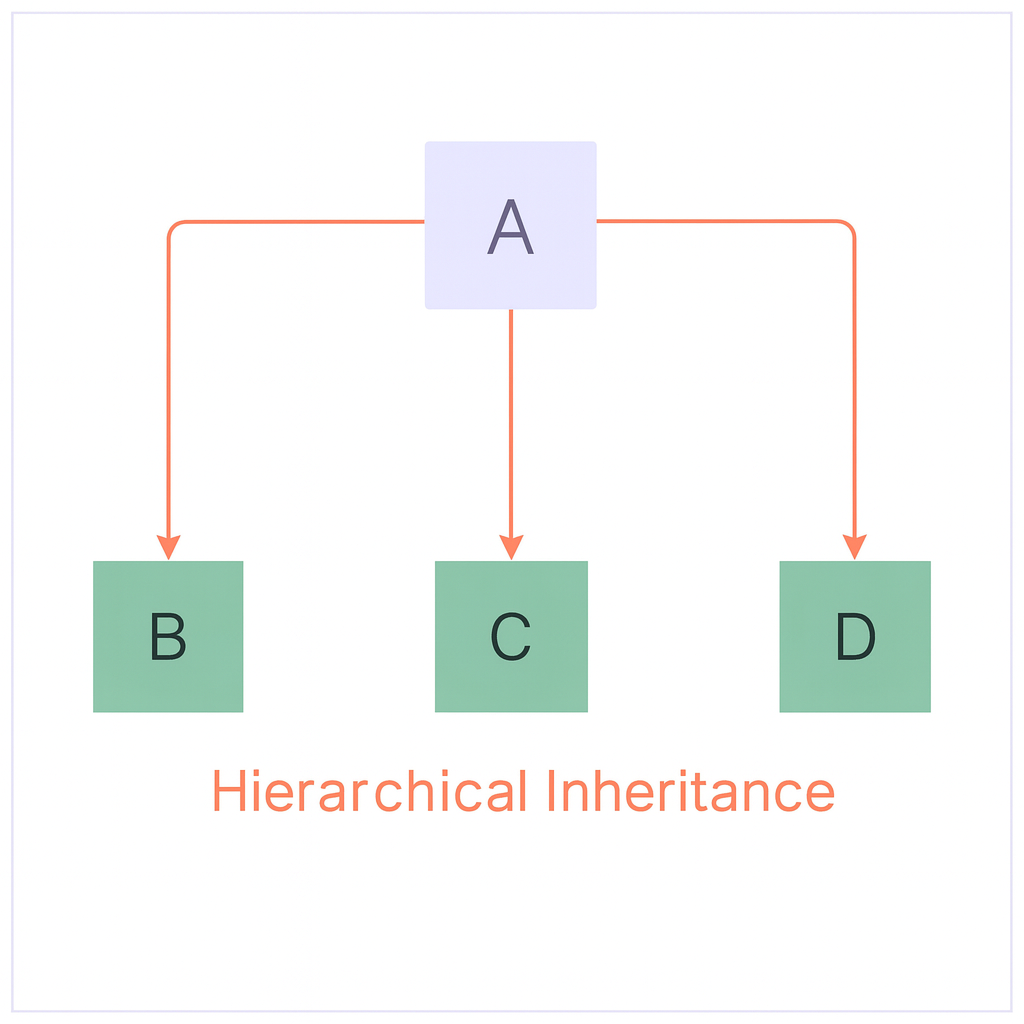

In [3]:
Image("../resources/inheritance_tree.png")
# Source: https://www.geeksforgeeks.org/types-of-inheritance-python/

### Using Hierarchical Inheritance to define specific types of stochastic processes

Let's see an example of a generic stochastic process class, and then define some specific types of stochastic processes as subclasses of this generic class.

In discrete time, a generic AR(1) (autoregressive, order 1) stochastic process is defined as

$$
X_{t} = f(X_{t-1})
$$

where $f$ is a function that takes the previous value of the process and returns the current value.  This can be a deterministic or a stochastic function. From this generic process we can define a variety of specific types of stochastic processes

| Process                   | Equation                                                   | Notes                                      |
|----------------------------|------------------------------------------------------------|--------------------------------------------|
| Generic AR(1)             | $X_{t} = f(X_{t-1})$                                      | $f$ can be deterministic or stochastic     |
| Identity                  | $X_{t} = X_{t-1}$                                         |                                            |
| Wiener                    | $X_{t} = X_{t-1} + \epsilon$                              | $\epsilon \sim N(0, \sigma^2)$             |
| Ornstein–Uhlenbeck        | $X_{t} = X_{t-1} - \alpha X_{t-1} + \sigma \epsilon$      | $\epsilon \sim N(0, 1), \ \Delta t = 1$    |
| Geometric Brownian Motion | $X_{t} = X_{t-1}(1 + \mu + \sigma \epsilon)$              | $\epsilon \sim N(0, 1), \ \Delta t = 1$    |

Wiener, Ornstein-Uhlenbeck, and Random Walk processes appear throughout natural sciences, and describe the diffusion of chemicals, small particles in fluids, and other phenomena.
Geometric Brownian Motion often occurs in finance, as well as other systems where random fluctuations are multiplicative (for example, when they act on percentage cjanges rather than absolute changes).

In [8]:
import numpy as np
class StochasticProcess:
    """
    A base class for stochastic processes.

    Parameters:
        start_val (float): The starting value of the process
        dim (int): The dimension of the process
        noise_level (float): The strength of the noise associated with the process.
        store_history (bool): Whether to store the history of the process
        random_state (int): The random state to use for reproducibility

    """

    def __init__(self, start_val, dim, noise_level=1.0, 
        store_history=True, random_state=None
    ):
        self.dim = dim
        self.start_val = start_val
        self.noise_level = noise_level

        self.store_history = store_history
        self.random_state = random_state

        self.state = start_val
        if self.store_history:
            self.history = [self.state]


    def run_process(self, num_steps):
        """
        Run the process for num_steps.
        """
        np.random.seed(self.random_state)
        for i in range(num_steps):
            self.state = self.step()
            if self.store_history:
                self.history.append(self.state)

        return self.state

    def step(self):
        """
        Subclasses should implement this method. Defaults to Identity process
        """
        # print("Not implemented")
        raise NotImplementedError

In [ ]:
ar1 = StochasticProcess(0.1, 1)

We can learn about the `StochasticProcess` class by calling the `help` function on it. We can see that the help function returns the docstring that we wrote above to describe the class, and it also lists the methods that we defined in the class and their docstrings.

In [ ]:
help(ar1)

Help on StochasticProcess in module __main__ object:

class StochasticProcess(builtins.object)
 |  StochasticProcess(
 |      start_val,
 |      dim,
 |      noise_level=1.0,
 |      store_history=True,
 |      random_state=None
 |  )
 |
 |  A base class for stochastic processes.
 |
 |  Parameters:
 |      start_val (float): The starting value of the process
 |      dim (int): The dimension of the process
 |      noise_level (float): The strength of the noise associated with the process.
 |      store_history (bool): Whether to store the history of the process
 |      random_state (int): The random state to use for reproducibility
 |
 |  Methods defined here:
 |
 |  __init__(
 |      self,
 |      start_val,
 |      dim,
 |      noise_level=1.0,
 |      store_history=True,
 |      random_state=None
 |  )
 |      Initialize self.  See help(type(self)) for accurate signature.
 |
 |  run_process(self, num_steps)
 |      Run the process for num_steps.
 |
 |  step(self)
 |      Subclasses s

We can now try running the `run_process` method on the specific `ar1` object with just instantiated.

In [9]:
ar1.run_process(100)

NotImplementedError: 

We can see that our base class `StochasticProcess` is not very useful by itself, because it does not actually implement a physical model in its `step` method. We thus need to use inheritance to define subclasses that implement specific types of stochastic processes.

In our implementation, each subclasses implements a different `step` method that describes the different physical processes. Otherwise, all of thesec subclasses are identical---they initialize the parent class in their own constructor by calling `super().__init__`. Notice that each subclasse's `__init__` method takes a special `*args` argument, as well as a special `**kwargs` argument. In python, `*args` is a special tuple of arguments that can get passed collectively as arguments to another function, here the `__init__` method of the parent class, and `**kwargs` is a dictionary of keyword arguments that are passed to the parent class constructor. As a result, our subclasses can take the `start_val`, `dim`, `noise_level`, `store_history`, and `random_state` arguments, as well as any other arguments that the parent class constructor takes.

In [14]:
## These subclasses are the different types of stochastic processes, and so they 
## inherit methods from the StochasticProcess class.

class IdentityProcess(StochasticProcess):
    """
    The identity process.

    Parameters:
        start_val (float): The starting value of the process
        dim (int): The dimension of the process
        noise_level (float): The strength of the noise associated with the process.
        store_history (bool): Whether to store the history of the process
        random_state (int): The random state to use for reproducibility

    See Also:
        StochasticProcess (parent class): The parent class for all stochastic processes.
    """
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        ## super() is a function that calls the constructor of the parent class(es) and
        ## passes passes arguments to it

    def step(self):
        return self.state


class WienerProcess(StochasticProcess):
    """
    The Wiener process.

    Parameters:
        start_val (float): The starting value of the process
        dim (int): The dimension of the process
        noise_level (float): The strength of the noise associated with the process.
        store_history (bool): Whether to store the history of the process
        random_state (int): The random state to use for reproducibility

    See Also:
        StochasticProcess (parent class): The parent class for all stochastic processes.
    """
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def step(self):
        return self.state + np.random.normal(0, self.noise_level)

We can also introduce new arguments to the constructor of the subclass, which are unique to the child and are not to the parent. For example, the `OrnsteinUhlenbeckProcess` class has an additional forcing term in the dynamics, and we can specify the amplitude of this force during instantiation.

In [21]:

class OrnsteinUhlenbeckProcess(StochasticProcess):
    """
    An Ornstein-Uhlenbeck process.

    Parameters:
        start_val (float): The starting value of the process
        dim (int): The dimension of the process
        noise_level (float): The strength of the noise associated with the process.
        store_history (bool): Whether to store the history of the process
        random_state (int): The random state to use for reproducibility
        force_amplitude (float): The amplitude of the deterministic forcing term

    See Also:
        StochasticProcess (parent class): The parent class for all stochastic processes.

    """

    def __init__(self, *args, force_amplitude=0.25, **kwargs):
        super().__init__(*args, **kwargs)
        self.force_amplitude = force_amplitude

    def step(self):
        return self.state + self.force_amplitude * (0 - self.state) + np.random.normal(0, self.noise_level)



class GeometricBrownianMotionProcess(StochasticProcess):
    """
    A geometric Brownian motion process.

    Parameters:
        start_val (float): The starting value of the process
        dim (int): The dimension of the process
        noise_level (float): The strength of the noise associated with the process.
        store_history (bool): Whether to store the history of the process
        random_state (int): The random state to use for reproducibility
        force_amplitude (float): The amplitude of the deterministic forcing term

    See Also:
        StochasticProcess (parent class): The parent class for all stochastic processes.

    """
    def __init__(self, *args, force_amplitude=0.25, **kwargs):
        super().__init__(*args, **kwargs)
        self.force_amplitude = force_amplitude

    def step(self):
        return self.state * (1 + self.force_amplitude + np.random.normal(0, self.noise_level))
        


Now, let's try running all of these processes to see that they behave as expected. For each process, we instantiate the child, which then implicity instantiates the parent. We then call the `run_process` method, which is a method associated with the child that it *inherits* from the parent. Because `step` is defined as a placeholder in the parent class, but the child class also implements a `step` method, the child's `step` method overrides the parent's `step` method and gets used instead in the call to `run_process`.

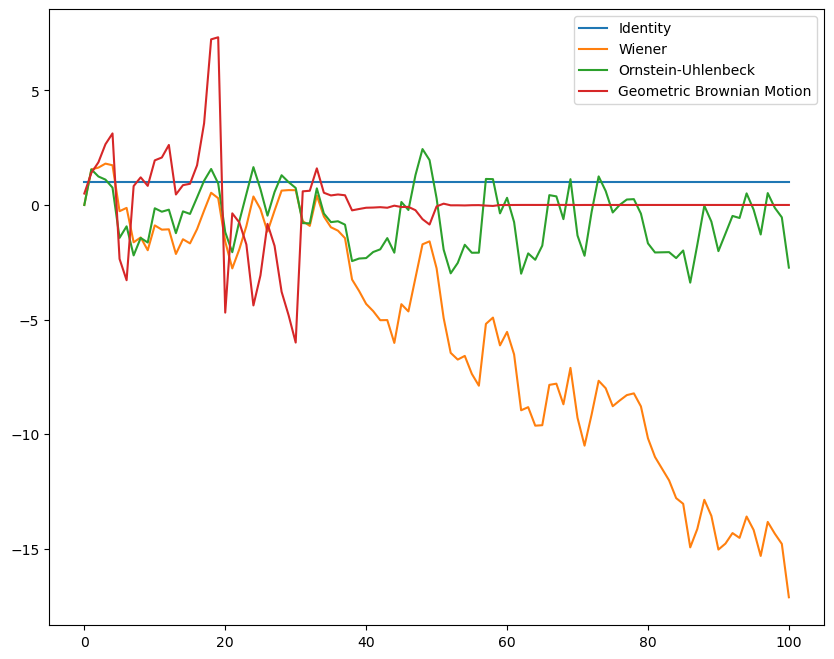

In [24]:
processes = ["Identity", "Wiener", "OrnsteinUhlenbeck", "GeometricBrownianMotion"]

plt.figure(figsize=(10, 8))

identity_process = IdentityProcess(1.0, 1, store_history=True, random_state=14)
identity_process.run_process(100)
plt.plot(identity_process.history, label="Identity")

wiener_process = WienerProcess(0.0, 1, store_history=True, random_state=14)
wiener_process.run_process(100)
plt.plot(wiener_process.history, label="Wiener")

ou_process = OrnsteinUhlenbeckProcess(0.0, 1, store_history=True, random_state=14)
ou_process.run_process(100)
plt.plot(ou_process.history, label="Ornstein-Uhlenbeck")

gb_process = GeometricBrownianMotionProcess(0.5, 1, store_history=True, random_state=14)
gb_process.run_process(100)
plt.plot(gb_process.history, label="Geometric Brownian Motion")



plt.legend()


We can see that the Weiner process (standard Brownian motion) and geometric Brownian motion process both appear to be non-ergodic, because the variance and likely other statistical properties of the process appear to change irreversibly over time. The Wiener process tends to move away from the origin, while the geometric Brownian motion process tends either collapse to zero or diverge to infinity.

We can further understand this behavior by simulating many realizations of these processes.

Text(0.5, 1.0, 'Wiener Process')

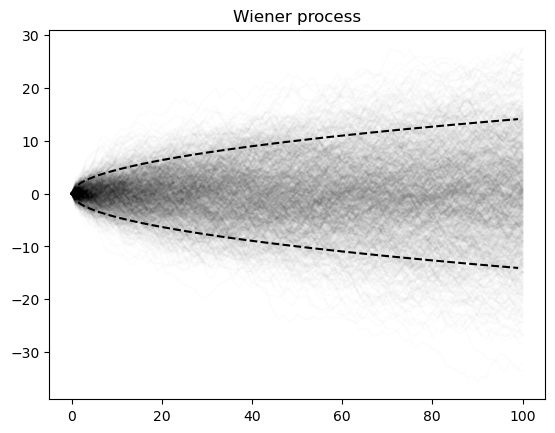

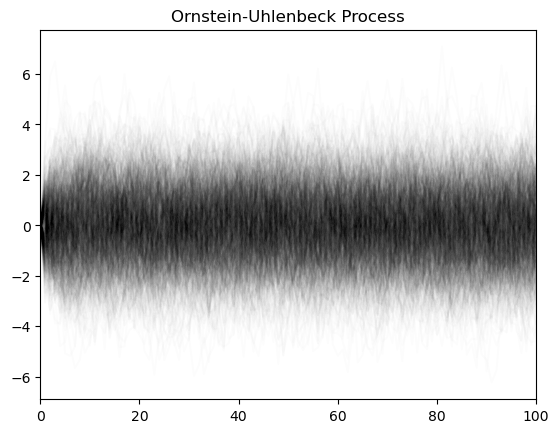

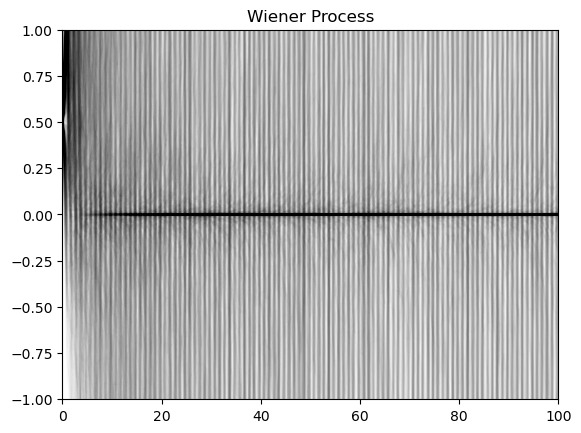

In [ ]:
plt.figure()
for i in range(1000): # index is over trajectories
    process = WienerProcess(0.0, 1, store_history=True)
    process.run_process(100)
    plt.plot(process.history, color="black", alpha=0.01)

plt.plot(np.arange(0, 100), np.sqrt(2 * np.arange(0, 100)), color="black", linestyle="--")
plt.plot(np.arange(0, 100), -np.sqrt(2 * np.arange(0, 100)), color="black", linestyle="--")
plt.title("Wiener process")

plt.figure()
for i in range(1000):
    process = GeometricBrownianMotionProcess(0.5, 1, store_history=True)
    process.run_process(100)
    plt.plot(process.history, color="black", alpha=0.01)
plt.xlim([0, 100])
plt.ylim([-1, 1])
plt.title("Wiener Process")


plt.figure()
for i in range(1000):
    process = OrnsteinUhlenbeckProcess(0.0, 1, store_history=True)
    process.run_process(100)
    plt.plot(process.history, color="black", alpha=0.01)
plt.xlim([0, 100])
plt.title("Ornstein-Uhlenbeck Process")

## Multiple Inheritance

In some cases, we may want to implement Python objects that inherit from multiple parent classes. This can get complicated when there are multiple methods with the same name, like the `step` method in our `StochasticProcess` class.

The method resolution order (MRO) defines the order in which Python looks for a method in a hierarchy of classes:
+ Daughter class methods take precendence over parent class methods. That's why we were able to override the empty `step` method in our `StochasticProcess` class.
+ However, if two parent classes at the same level of an inheritance hierarchy have the same method, the *first* one listed in the class definition will take precedence


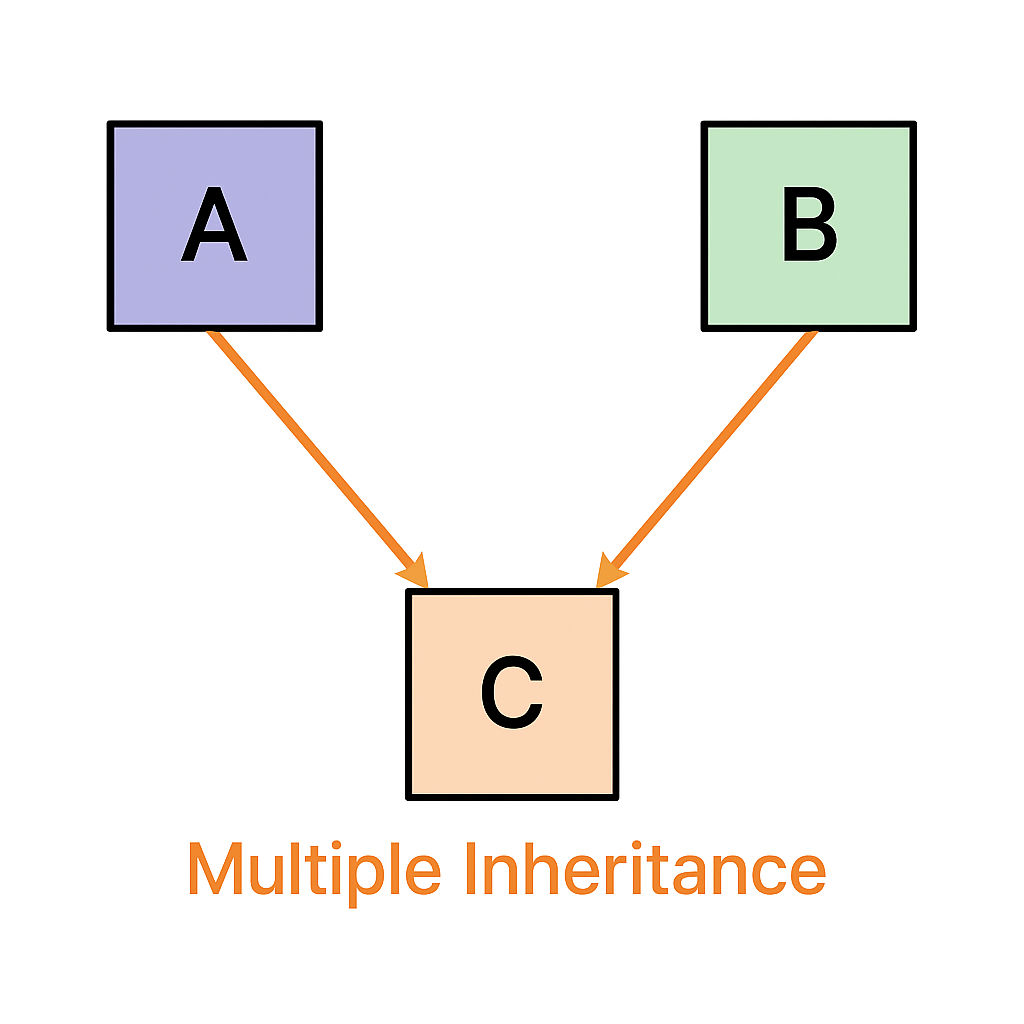

In [4]:
Image("../resources/multiple_inheritance.png")
# Source: https://www.geeksforgeeks.org/types-of-inheritance-python/

Here's a minimal example of multiple inheritance in Python. Notice that, since we don't have any arguments for the constructor, we don't need to explicitly write an `__init__` method in the parent or child, and the child doesn't need to call the parent's `__init__` method with `super()`.

In [ ]:

class A:
    def print_name(self):
        print("Ernest")

class B(A):
    def print_name(self):
        print("Amelia")

class C(A):
    def print_name(self):
        print("Ferdinand")

class D(B, C):
    pass

# a = A()
# a.print_name() 

# b = B()
# b.print_name() 

d = D()
d.print_name()


Ferdinand


We can use this same idea to implement a base class for halting processes, which is a stochastic process that halts when a threshold is reached.

Text(0, 0.5, 'Position')

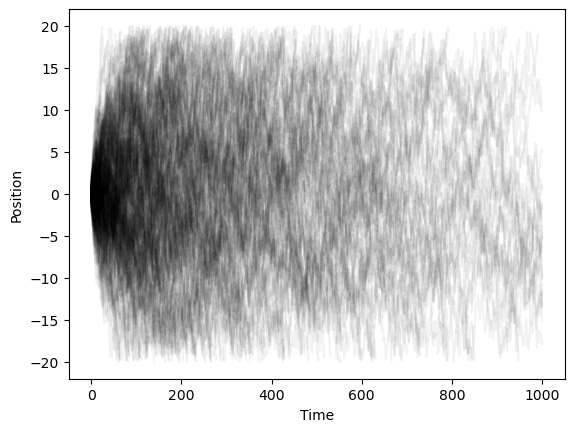

In [ ]:
class HaltingProcess:
    """
    A base class for halting processes.
    
    Parameters
        threshold (float): The threshold at which the process halts
    """
    def __init__(self, threshold):
        self.threshold = threshold
        # self.store_history = True

    def step(self):
        """
        Subclasses or sibling classes should implement this method
        """
        raise NotImplementedError

    def run_halting_process(self, max_iter=1000):
        """
        Run a halting process, which is a stochastic process that halts when a threshold 
            is reached. If the threshold is not reached after max_iter, then the process
            is halted and the last value is returned.
        """
        np.random.seed(self.random_state)
        for i in range(max_iter):
            self.state = self.step()

            if np.abs(self.state) > self.threshold:
                self.halt_time = i
                break
                # The break statement exits the for loop and stops the simulation
                # before max_iter is reached

            if self.store_history:
                self.history.append(self.state)

        return self.state


class BrownianHaltingProcess(WienerProcess, HaltingProcess):
    # The order matters here

    def __init__(self, start_val, threshold, **kwargs):
        HaltingProcess.__init__(self, threshold)
        WienerProcess.__init__(self, start_val, **kwargs)
        # The order does not matter here


class OUHaltingProcess(OrnsteinUhlenbeckProcess, HaltingProcess):
    # The order matters here

    def __init__(self, start_val, threshold, **kwargs):
        HaltingProcess.__init__(self, threshold)
        OrnsteinUhlenbeckProcess.__init__(self, start_val, **kwargs)
        # The order does not matter here


plt.figure()
for i in range(300):
    model = BrownianHaltingProcess(0.0, 20.0, store_history=True)
    model.run_halting_process()
    plt.plot(model.history, color="black", alpha=0.05)
plt.xlabel("Time")
plt.ylabel("Position")


Text(0, 0.5, 'Position')

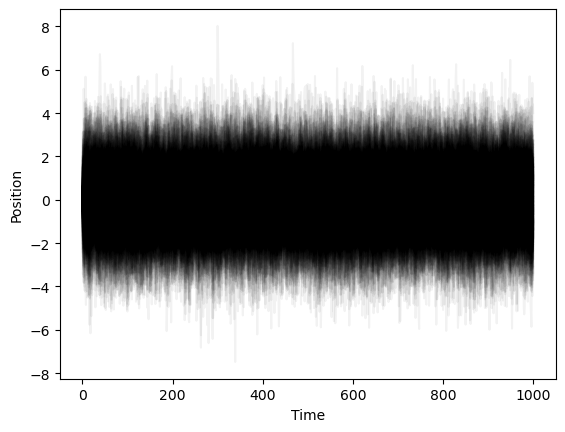

In [37]:

plt.figure()
for i in range(300):
    model = OUHaltingProcess(0.0, 20.0, store_history=True)
    model.run_halting_process()
    plt.plot(model.history, color="black", alpha=0.05)
plt.xlabel("Time")
plt.ylabel("Position")


# Some other useful built-ins functions for iterables

When we want to iterate over two or more arrays at the same time, we can use the `zip` function to pair their values together. This can be more concise than using a for loop and then indexing into each of the arrays. Likewise, we can use the `enumerate` function to iterate over an array and get both the index and the value at each step.


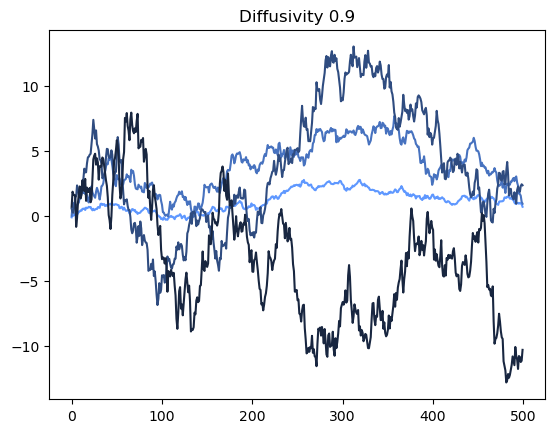

In [35]:
# enumerate provies a tuple of index and value
diffusivities = [0.1, 0.3, 0.6, 0.9]

weiner_process = lambda n, sigma: np.cumsum(np.random.normal(0, sigma, n))
blue = np.array([0.372549, 0.596078, 1])
for i, sigma in enumerate(diffusivities):
    plt.plot(weiner_process(500, sigma), color=blue * (1 - i / len(diffusivities)))
    plt.title(f"Diffusivity {sigma}")

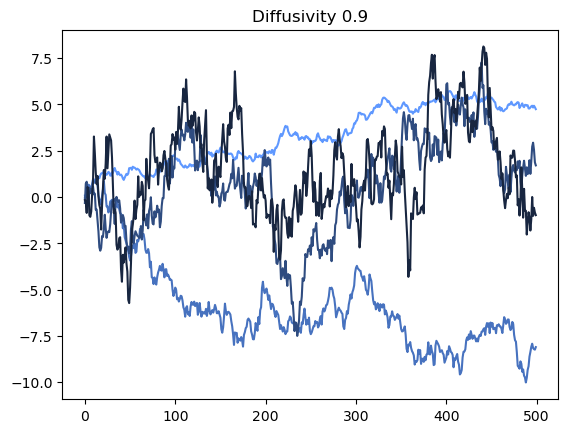

In [36]:
# zip pairs values together
diffusivities = [0.1, 0.3, 0.6, 0.9]

weiner_process = lambda n, signma: np.cumsum(np.random.normal(0, signma, n))
colors = np.array([0.372549, 0.596078, 1]) * (1 - np.arange(0, 1, 0.25)[:, None])
for color, sigma in zip(colors, diffusivities):
    plt.plot(weiner_process(500, sigma), color=color)
    plt.title(f"Diffusivity {sigma}")

## Generators

Generators are functions with an internal "state" that serves as a memory. Conceptually, they serve as an intermediate between functions (stateless) and custom objects (stateful). Generators are particularly useful when you don't want to store an entire array in memory, but still want to iterate over a sequence of values. This is sometimes called a "lazy evaluation" of a sequence, because the values are computed on-the-fly as the generator is iterated over, rather than being computed and stored in advance of the iteration.


In [41]:
def weiner_process(x, max_iter=100):
    for i in range(max_iter):
        yield x + np.random.normal(0, 1)

# next causes the generator to run and then stop when the next yield is reached
process = weiner_process(0)
for i in range(10):
    print(next(process))

1.3047580924456652
-0.05729797829739105
0.5517854029444775
-0.7233012910563584
1.5684284787181064
0.7524096043633353
-1.2311972149145427
0.6348516602027625
-0.3477898301057568
-0.028658650890176128
